
https://datascienceschool.net/view-notebook/70ce46db4ced4a999c6ec349df0f4eb0/

# 데이터 불러오기

In [15]:
import pandas as pd
# 데이터
drz_review = pd.read_excel('닥터지 브라이트닝 업 선 50ml(SPF50)_ver2.xlsx')
hera_review = pd.read_excel('헤라 선 메이트 데일리 70ml(SPF35)_ver2.xlsx')

drz_review_12 = drz_review.loc[drz_review.score < 3 ]
drz_review_5 = drz_review.loc[drz_review.score == 5]
hera_review_12 = hera_review.loc[hera_review.score < 3 ]
hera_review_5 = hera_review.loc[hera_review.score == 5]
#drz_review = drz_review.loc[(drz_review.score == 1) | (drz_review.score == 3) ] # 이렇게 하려면


In [16]:
print(drz_review_5.review.iloc[0]) # review 행에 대한 1번째 행
print("============================================================================")
print(drz_review_5.iloc[0]) # 1번째 행
print("============================================================================")
print(drz_review_5.iloc[:,0]) # 1번열
#len(hera_review_12)

2년넘게 닥터지 선크림 쓰고 있는데 요번에 다써서 다시 재구매합니다. 깔끔하게 살짝 톤보정도 되고 끈적거리지도 않아서 잘 사용하고 있어요. 그리구 다른 것보다도 감동인게 사은품을 엄청 많이 주셨네요ㅠㅠㅠ선크림만 해두 오프라인에서 구매하는 것보다 저렴한데 완전 푸짐한 샘플들 감사합니다! 마침 닥터지 필링젤 살까 망설였는데 샘플로 잘 쓸 수 있어서 좋네용!유통기한도 넉넉하네용^-^
review    2년넘게 닥터지 선크림 쓰고 있는데 요번에 다써서 다시 재구매합니다. 깔끔하게 살짝...
score                                                     5
Name: 1, dtype: object
1        2년넘게 닥터지 선크림 쓰고 있는데 요번에 다써서 다시 재구매합니다. 깔끔하게 살짝...
2        보통은 화장을 하니 워터느낌의 선크림을 애용했는데 남친이 톤업되면서 부드럽게 발리는...
3        일단 확실히 톤업이 되구요! 또 발림성도 좋아요! 사은품으로 오는 크림이 30ml나...
6        제품은 믿고 쓰는 썬크림입이다.하지만 배송에 정말 깜짝 놀랐습니다.금일 배송 예정이...
7        항상 썬크림은 비싼게 좋다는생각을 하던 1인~~ --;;;;난생처음 겟잇뷰티 1위 ...
8        끈적이는 느낌 때문에 썬크림 바르는 걸 싫어했는데 이 제품은 하나도 끈적이지 않고 ...
9        올**영에서 테스트하고 여기서 삽니다. 피부가 예민한 편이라 남들 다 잘쓰는 제품도...
10       제가 좀 민감해서 썬크림은 항상 닥터지 마일드만 썼었어요.. 갈아탔다가도 바로 뒤짚...
11       배송. 상품성 가격. 만족!!(30대 초반 장시간 풀메하는 흔녀)말로만 듣다 고민하...
13       제가 지금까지 많이는 아니고 몇 종류의 미백제품을 써봤는데, 너무 허얘보이거나 바를...
14       닥터지는 선크림이 유명해서 알게된 브랜드에요.피지분비 많은 한여름엔 뽀송하게발려서

# 형태소분석

## STEP1
- pos_list = [[('2', 'NR'), ('년', 'NNM'), ('넘', 'VV'), ('게', 'ECD'), ('닥터지', 'UN'), ('선', 'NNG'), ('크림', 'NNG'), ('쓰', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('는데', 'ECD').....] : 이렇게 문장을 형태소분석한 게 한번에 들어있음
- pos = ('2', 'NR') , ('년', 'NNM') : 요런식으로 각각 하나씩 떼서 보려고 
- my_pos_list : 내가 원하는 list 지정해놓고 예를들어 명사, 형용사만 보고싶어서 

- 꼬꼬마 분석기에서  VA:형용사  MAG:부사  NNG,NNP:일반명사의존명사  VV:동사

In [17]:
from konlpy.tag import Kkma
kkma = Kkma()

pos_list = []
for i in range(200) :
    morph = kkma.pos(drz_review_5.iloc[i,0])
    pos_list.append(morph)
    
    my_pos_word_list = []
    for pos in pos_list:
        word_list = [word for word, pumsa in pos if pumsa in ['NNG','NNP',"VA","MAG","VV"]]
        my_pos_word_list.extend(word_list)
        
print(my_pos_word_list)

['넘', '선', '크림', '쓰', '요번', '다', '쓰', '다시', '구매', '살짝', '톤', '보정', '되', '끈적거리', '않', '잘', '사용', '그리', '다르', '감동', '사은품', '엄청', '많이', '주', '선', '크림', '해', '오프라인', '구매', '완전', '샘플', '감사', '마침', '필링', '젤', '살', '망설이', '샘플', '잘', '쓰', '있', '좋', '유통', '기한', '보통', '화장', '하', '워터', '느낌', '선', '크림', '애용', '남친', '톤', '업', '부드럽', '발리', '선', '크림', '사서', '쓰', '보', '오프라인', '조금', '여름', '하', '듬뿍', '바르', '고', '사', '미니', '사이즈', '제가', '챙기', '발라보', '생각', '발림', '괜찮', '바른', '직후', '눈', '시리', '없', '좋', '물', '닿', '흐르', '눈', '좀', '시렵', '그리고', '자외선', '차단', '때', '선', '크림', '엄청', '많이', '발르', '하', '듣', '이건', '많이', '바르', '동동', '뜨', '보', '못', '그냥', '비상용', '남친', '데일리', '사용', '남친', '본인', '쓰', '본거', '가장', '잘', '발리', '적당히', '하얘지', '다', '하', '일단', '확실히', '톤', '업', '되', '또', '발림', '좋', '사은품', '오', '크림', '나', '되', '튜브', '또', '완전', '마음', '듣', '마스크', '팩', '넣', '친구', '탐내', '정도', '티', '케이스', '너무', '예쁘', '빨리', '쓰', '또', '사', '같', '성분', '좋', '하', '본격', '자외선', '계절', '아주', '잘', '쓰', '같', '제품', '믿', '쓰', '썰', '크림', '입이', '배송', '정말'

## STEP2
### TF 기준
- 데이터 정규화 과정 : 형태소분석한 것중에서 이상하게 분리된거 제거 

In [18]:
from collections import Counter
counts = Counter(my_pos_word_list)
counts_100 = counts.most_common(100)
print(counts_100) 

# 몇개 제거해야겠군,,(정규)

[('크림', 248), ('좋', 246), ('쓰', 237), ('하', 165), ('바르', 153), ('선', 128), ('피부', 120), ('톤', 114), ('구매', 109), ('제품', 109), ('같', 105), ('잘', 100), ('되', 95), ('업', 91), ('없', 89), ('있', 85), ('썰', 83), ('너무', 78), ('안', 73), ('사', 66), ('많이', 62), ('사용', 60), ('화장', 59), ('때', 59), ('다', 58), ('여름', 47), ('샘플', 44), ('발르', 43), ('유', 43), ('느낌', 42), ('끈적이', 37), ('얼굴', 37), ('건조', 37), ('만족', 35), ('보', 34), ('가격', 34), ('전', 34), ('더', 32), ('지성', 32), ('또', 31), ('정말', 31), ('정도', 30), ('좀', 29), ('듣', 29), ('분기', 29), ('번들거리', 28), ('같이', 27), ('많', 26), ('추천', 25), ('넘', 24), ('오', 24), ('아주', 24), ('딱', 24), ('마무리', 24), ('사용하', 24), ('처음', 23), ('알', 23), ('약간', 23), ('보정', 22), ('발림', 22), ('건성', 22), ('닥터', 22), ('자연', 22), ('진짜', 22), ('살', 21), ('밀리', 21), ('백탁', 21), ('받', 20), ('해지', 20), ('주', 19), ('발리', 19), ('생각', 19), ('괜찮', 19), ('배송', 19), ('들', 19), ('계속', 19), ('수분', 19), ('분', 19), ('사은품', 18), ('앞', 18), ('다니', 18), ('메이크업', 18), ('파', 18), ('현상', 18), ('베이스'

In [19]:
remove_list = ["선","없","업","있","안","다","사","보","쓰","하","되"]

my_pos_count_list = []
for my_pos in my_pos_word_list:
    if my_pos not in remove_list:
        my_pos_count_list.append(my_pos)
#print(my_pos_count_list)

In [20]:
counts = Counter(my_pos_count_list)
counts_100 = counts.most_common(100)
print(counts_100)

[('크림', 248), ('좋', 246), ('바르', 153), ('피부', 120), ('톤', 114), ('구매', 109), ('제품', 109), ('같', 105), ('잘', 100), ('썰', 83), ('너무', 78), ('많이', 62), ('사용', 60), ('화장', 59), ('때', 59), ('여름', 47), ('샘플', 44), ('발르', 43), ('유', 43), ('느낌', 42), ('끈적이', 37), ('얼굴', 37), ('건조', 37), ('만족', 35), ('가격', 34), ('전', 34), ('더', 32), ('지성', 32), ('또', 31), ('정말', 31), ('정도', 30), ('좀', 29), ('듣', 29), ('분기', 29), ('번들거리', 28), ('같이', 27), ('많', 26), ('추천', 25), ('넘', 24), ('오', 24), ('아주', 24), ('딱', 24), ('마무리', 24), ('사용하', 24), ('처음', 23), ('알', 23), ('약간', 23), ('보정', 22), ('발림', 22), ('건성', 22), ('닥터', 22), ('자연', 22), ('진짜', 22), ('살', 21), ('밀리', 21), ('백탁', 21), ('받', 20), ('해지', 20), ('주', 19), ('발리', 19), ('생각', 19), ('괜찮', 19), ('배송', 19), ('들', 19), ('계속', 19), ('수분', 19), ('분', 19), ('사은품', 18), ('앞', 18), ('다니', 18), ('메이크업', 18), ('파', 18), ('현상', 18), ('베이스', 18), ('이', 18), ('나', 17), ('구입', 17), ('그러', 17), ('여', 17), ('효과', 17), ('기초', 17), ('살짝', 16), ('후', 16), ('다르', 15), (

### TF-IDF 기준

In [21]:
# 2. Count 하는데 tf-idf 기준으로 (문서에서 너무 많이나온 단어는 제외해줌)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(tokenizer=str.split, norm = "l1",max_features = 100 ) # L1정규화 ,100개만 
doc_term_mat = vectorizer.fit_transform(my_pos_word_list)
vocabulary = vectorizer.vocabulary_
vocabulary

{'넘': 14,
 '선': 56,
 '크림': 90,
 '쓰': 60,
 '다': 16,
 '구매': 7,
 '살짝': 53,
 '톤': 91,
 '보정': 44,
 '되': 21,
 '잘': 77,
 '사용': 49,
 '다르': 18,
 '사은품': 51,
 '많이': 30,
 '주': 84,
 '샘플': 54,
 '살': 52,
 '있': 75,
 '좋': 83,
 '화장': 97,
 '하': 94,
 '느낌': 15,
 '업': 67,
 '부드럽': 45,
 '발리': 37,
 '보': 43,
 '여름': 71,
 '바르': 34,
 '사': 48,
 '생각': 55,
 '발림': 38,
 '괜찮': 6,
 '없': 68,
 '좀': 82,
 '때': 25,
 '발르': 36,
 '듣': 22,
 '또': 26,
 '오': 72,
 '나': 12,
 '정도': 79,
 '너무': 13,
 '같': 1,
 '아주': 61,
 '제품': 81,
 '썰': 59,
 '배송': 39,
 '정말': 80,
 '안': 62,
 '앞': 64,
 '받': 35,
 '추천': 89,
 '처음': 88,
 '주문': 85,
 '건성': 3,
 '피부': 93,
 '닥터': 19,
 '자연': 76,
 '알': 63,
 '만족': 28,
 '번들거리': 41,
 '끈적이': 11,
 '얼굴': 66,
 '후': 99,
 '더': 20,
 '없이': 69,
 '구입': 8,
 '다니': 17,
 '딱': 24,
 '가격': 0,
 '마무리': 27,
 '들': 23,
 '메이크업': 32,
 '그러': 9,
 '여': 70,
 '파': 92,
 '많': 29,
 '계속': 5,
 '시': 58,
 '효과': 98,
 '같이': 2,
 '건조': 4,
 '현상': 96,
 '약간': 65,
 '사용하': 50,
 '전': 78,
 '맞': 31,
 '밀리': 33,
 '수분': 57,
 '지성': 86,
 '백탁': 40,
 '분': 46,
 '유': 73,
 '분기': 

## STEP3
### TF 기준 워드클라우드 진행 

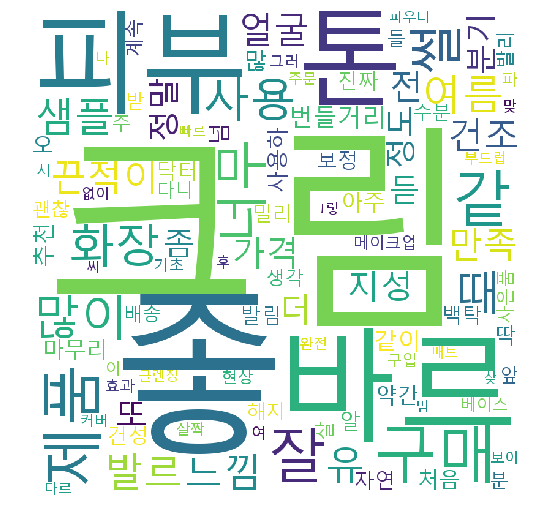

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(counts_100)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)

fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### TF 기준 워드클라우드 진행 

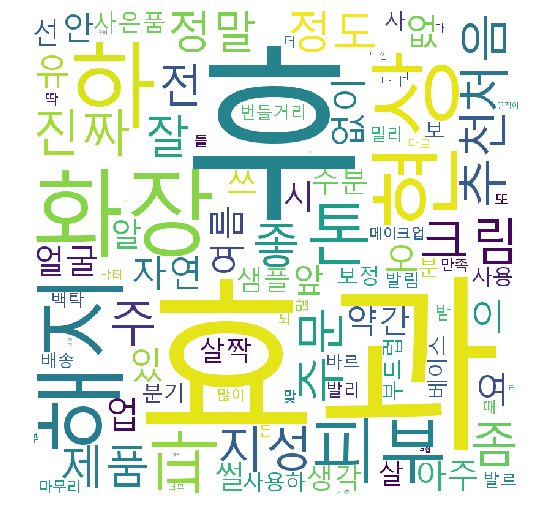

In [25]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(vocabulary)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# 위 과정을 형태소분석기 비교해보자 

In [2]:
import pandas as pd
### 데이터
drz_review = pd.read_excel('닥터지 브라이트닝 업 선 50ml(SPF50).xlsx')
hera_review = pd.read_excel('헤라 선 메이트 데일리 70ml(SPF35).xlsx')

drz_review_12 = drz_review.loc[drz_review.score < 3 ]  ### 문제가 있는 데이터셋, 형태소분석기안돌아감 ###
drz_review_5 = drz_review.loc[drz_review.score == 5]
hera_review_12 = hera_review.loc[hera_review.score < 3 ]
hera_review_5 = hera_review.loc[hera_review.score == 5]

# 데이터 바꿔가면서 진행
data = drz_review_5 
print(len(data))

24647


## 꼬꼬마분석기 형태소분석

In [3]:

from konlpy.tag import Kkma
kkma = Kkma()

pos_list = []
for i in range(200) : # 너무느려서 200개밖에 형태소분석 못함 
    morph = kkma.pos(data.iloc[i,0])
    pos_list.append(morph)
    my_pos_word_list = []
    for pos in pos_list:
        word_list = [word for word, pumsa in pos if pumsa in ['NNG','NNP',"VA","MAG","VV"]]
        my_pos_word_list.extend(word_list)

### 빈도수 세기 
from collections import Counter
counts = Counter(my_pos_word_list)
counts_100 = counts.most_common(100)
print(counts_100)   # 몇개 제거해야겠군,,(정규)

remove_list = ["선","없","업","있","안","다","사","보","쓰","하","되"]
my_pos_count_list = []
for my_pos in my_pos_word_list:
    if my_pos not in remove_list:
        my_pos_count_list.append(my_pos)
#print(my_pos_count_list)

counts = Counter(my_pos_count_list)
counts_100 = counts.most_common(100)
print(counts_100)

### 워드클라우드 그리기 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(counts_100)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


[('크림', 248), ('좋', 246), ('쓰', 237), ('하', 165), ('바르', 153), ('선', 128), ('피부', 120), ('톤', 114), ('구매', 109), ('제품', 109), ('같', 105), ('잘', 100), ('되', 95), ('업', 91), ('없', 89), ('있', 85), ('썰', 83), ('너무', 78), ('안', 73), ('사', 66), ('많이', 62), ('사용', 60), ('화장', 59), ('때', 59), ('다', 58), ('여름', 47), ('샘플', 44), ('발르', 43), ('유', 43), ('느낌', 42), ('끈적이', 37), ('얼굴', 37), ('건조', 37), ('만족', 35), ('보', 34), ('가격', 34), ('전', 34), ('더', 32), ('지성', 32), ('또', 31), ('정말', 31), ('정도', 30), ('좀', 29), ('듣', 29), ('분기', 29), ('번들거리', 28), ('같이', 27), ('많', 26), ('추천', 25), ('넘', 24), ('오', 24), ('아주', 24), ('딱', 24), ('마무리', 24), ('사용하', 24), ('처음', 23), ('알', 23), ('약간', 23), ('보정', 22), ('발림', 22), ('건성', 22), ('닥터', 22), ('자연', 22), ('진짜', 22), ('살', 21), ('밀리', 21), ('백탁', 21), ('받', 20), ('해지', 20), ('주', 19), ('발리', 19), ('생각', 19), ('괜찮', 19), ('배송', 19), ('들', 19), ('계속', 19), ('수분', 19), ('분', 19), ('사은품', 18), ('앞', 18), ('다니', 18), ('메이크업', 18), ('파', 18), ('현상', 18), ('베이스'

<Figure size 1200x900 with 1 Axes>

In [7]:
# 한글폰트 깨짐현상 해결 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

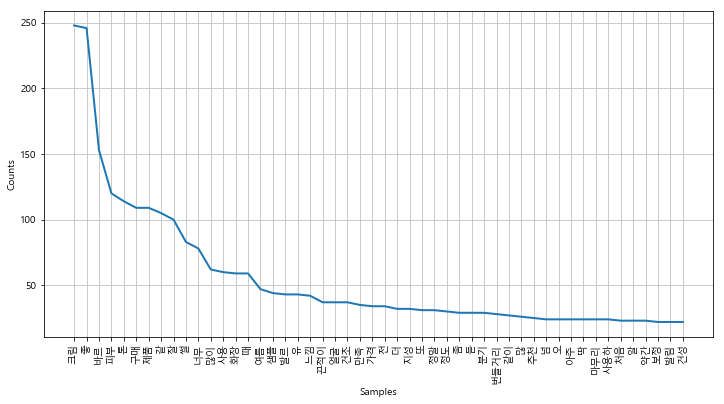

In [26]:
### Freq Dist 그리기 
import nltk
freq = nltk.Text(my_pos_count_list,name = "빈도그래프")
freq.vocab()
plt.figure(figsize = (12,6))
freq.plot(50)
plt.show()

## 트위터분석기 형태소분석

C:\Users\jeeyeon\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('피부', 127), ('선크림', 121), ('제품', 110), ('썬크림', 92), ('구매', 86), ('너무', 86), ('것', 80), ('사용', 79), ('잘', 75), ('톤', 63), ('화장', 59), ('닥터', 56), ('같아요', 56), ('많이', 55), ('때', 53), ('써', 53), ('좋아요', 52), ('톤업', 50), ('거', 50), ('끈', 49), ('바르고', 48), ('다', 46), ('저', 46), ('여름', 45), ('샘플', 44), ('않고', 41), ('느낌', 40), ('입니다', 39), ('이', 39), ('유', 39), ('번', 38), ('얼굴', 38), ('해서', 36), ('가격', 35), ('발라', 34), ('제', 33), ('했는데', 31), ('정말', 31), ('쓰고', 30), ('또', 30), ('정도', 30), ('했어요', 30), ('크림', 29), ('전', 29), ('좀', 28), ('할', 28), ('더', 28), ('거리', 26), ('바르면', 26), ('추천', 26), ('하나', 26), ('좋네요', 26), ('좋은', 26), ('없고', 25), ('마무리', 25), ('넘', 25), ('재구매', 24), ('해', 24), ('건성', 24), ('같이', 24), ('분기', 24), ('약간', 23), ('보정', 22), ('발림', 22), ('아주', 22), ('배송', 22), ('처음', 22), ('개', 22), ('탁', 21), ('되고', 20), ('다른', 20), ('보고', 20), ('진짜', 20), ('합니다', 19), ('사은', 19), ('생각', 19), ('상품', 19), ('계속', 19), ('지성', 19), ('있어요', 18), ('품', 18), ('하는', 18), ('메이크업', 18), ('베이스',

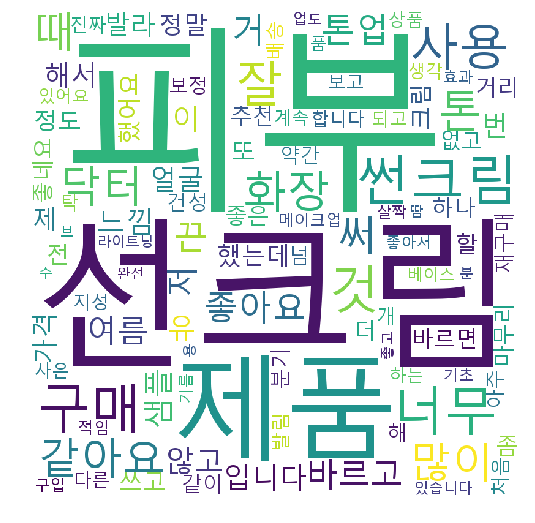

In [8]:

from konlpy.tag import Twitter
twitter = Twitter()

pos_list = []
for i in range(200) : # 너무느려서 200개밖에 형태소분석 못함 
    morph = twitter.pos(data.iloc[i,0])
    pos_list.append(morph)
    my_pos_word_list = []
    for pos in pos_list:
        word_list = [word for word, pumsa in pos if pumsa in ["Noun", "Verb", "Adverb", "Adjective"]]
        my_pos_word_list.extend(word_list)

### 빈도수 세기 
from collections import Counter
counts = Counter(my_pos_word_list)
counts_100 = counts.most_common(100)
print(counts_100)   # 몇개 제거해야겠군,,(정규)

remove_list = ["선","없","업","있","안","다","사","보","쓰","하","되"]
my_pos_count_list = []
for my_pos in my_pos_word_list:
    if my_pos not in remove_list:
        my_pos_count_list.append(my_pos)
#print(my_pos_count_list)

counts = Counter(my_pos_count_list)
counts_100 = counts.most_common(100)
print(counts_100)

### 워드클라우드 그리기 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(counts_100)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


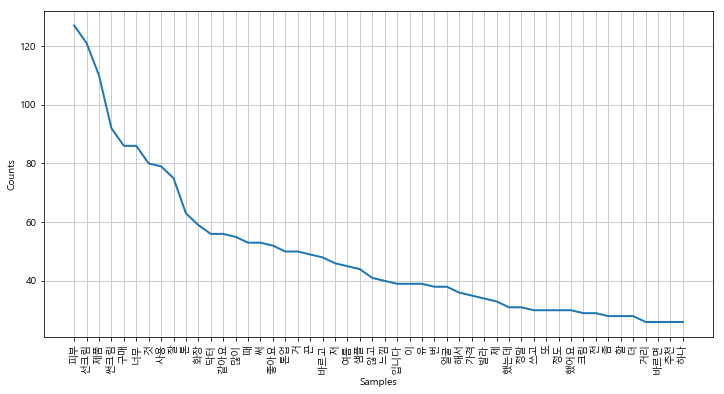

In [9]:
### Freq Dist 그리기 
import nltk
freq = nltk.Text(my_pos_count_list,name = "빈도그래프")
freq.vocab()
plt.figure(figsize = (12,6))
freq.plot(50)
plt.show()

## 한나눔 분석기 형태소분석
   - 명사(N)에 대해서만 진행하였고 속도가 매우빨랐다 

[('것', 204), ('선크림', 159), ('제품', 146), ('구매', 135), ('저', 129), ('피부', 119), ('사용', 114), ('썬크림', 108), ('적', 76), ('닥터', 71), ('샘플', 71), ('만족', 67), ('때', 66), ('화장', 65), ('톤업', 58), ('여름', 52), ('건조', 52), ('얼굴', 51), ('가격', 45), ('수', 43), ('발림성', 43), ('데', 41), ('ㅎㅎ', 41), ('배송', 40), ('추천', 39), ('유분기', 39), ('전', 39), ('사은품', 37), ('이', 35), ('구입', 34), ('이거', 34), ('주문', 32), ('자연', 32), ('진짜', 32), ('저렴', 29), ('듯', 29), ('완전', 27), ('건성', 27), ('이것', 27), ('후', 27), ('하나', 27), ('마무리', 26), ('지성', 26), ('피부톤', 25), ('지성피부', 25), ('생각', 24), ('정도', 24), ('리', 23), ('편', 23), ('보송', 23), ('마음', 22), ('재구', 21), ('산뜻', 21), ('향', 20), ('이번', 20), ('화사', 20), ('근데', 19), ('효과', 19), ('베이스', 19), ('감사', 18), ('트러블', 18), ('메이크업', 18), ('브라이트닝', 18), ('들', 18), ('느낌', 17), ('기분', 17), ('보정', 17), ('1+1', 17), ('크림', 16), ('겟잇뷰티', 16), ('중', 16), ('상품', 16), ('수분크림', 16), ('백탁현상', 16), ('행사', 15), ('파운데이션', 15), ('평소', 15), ('업', 15), ('여기', 14), ('걱정', 14), ('커버', 14), ('톤', 14)

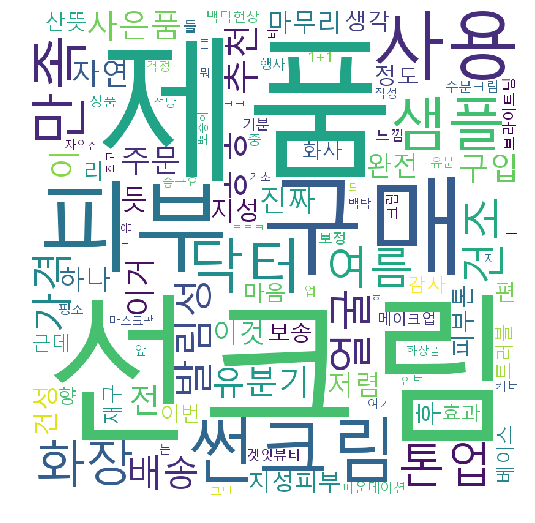

In [27]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

pos_list = []
for i in range(500) : # 갯수 늘려도 매우빠름
    morph = hannanum.pos(data.iloc[i,0])
    pos_list.append(morph)
    
    my_pos_word_list = []
    for pos in pos_list:
        word_list = [word for word, pumsa in pos if pumsa in ['N']]
        my_pos_word_list.extend(word_list)

### 빈도수 세기 
from collections import Counter
counts = Counter(my_pos_word_list)
counts_100 = counts.most_common(100)
print(counts_100)   # 몇개 제거해야겠군,,(정규)

remove_list = ["것","저","적","때","수","데"]
my_pos_count_list = []
for my_pos in my_pos_word_list:
    if my_pos not in remove_list:
        my_pos_count_list.append(my_pos)
#print(my_pos_count_list)

counts = Counter(my_pos_count_list)
counts_100 = counts.most_common(100)
print(counts_100)

### 워드클라우드 그리기 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(counts_100)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


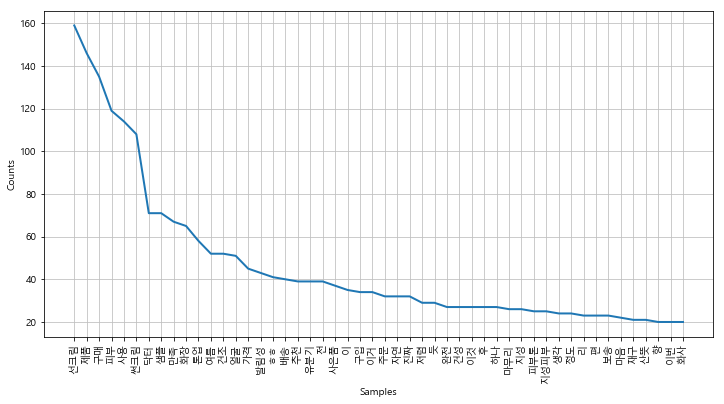

In [28]:
### Freq Dist 그리기 
import nltk
freq = nltk.Text(my_pos_count_list,name = "빈도그래프")
freq.vocab()
plt.figure(figsize = (12,6))
freq.plot(50)
plt.show()

## 코모란 형태소분석기 
 - 이것도 매우 빠름 

[('쓰', 476), ('크림', 446), ('서', 239), ('하', 222), ('되', 181), ('썬', 163), ('있', 161), ('닥터', 106), ('사', 101), ('바르', 97), ('피부', 94), ('끈적이', 75), ('제품', 74), ('유', 62), ('들', 61), ('지성', 56), ('알', 55), ('발림', 54), ('화장', 51), ('번들거리', 51), ('보', 48), ('분기', 45), ('보정', 44), ('발라', 44), ('오', 43), ('탁', 43), ('받', 41), ('베이스', 39), ('다니', 38), ('나', 37), ('한', 36), ('이', 35), ('송', 35), ('좋아서', 35), ('수분', 35), ('제가', 34), ('맞', 34), ('밀리', 34), ('발리', 33), ('!!', 33), ('1+1', 30), ('성도', 29), ('찾', 29), ('가격', 28), ('살', 27), ('송도', 27), ('모르', 26), ('트러블', 26), ('요', 26), ('챙기', 25), ('커버', 25), ('보이', 25), ('이건', 24), ('현상', 23), ('뜨', 22), ('이랑', 22), ('드', 21), ('믿', 20), ('나가', 20), ('사서', 19), ('바른', 19), ('정도', 19), ('끈적거리', 18), ('지나', 18), ('매트', 18), ('마스크', 17), ('느끼', 17), ('나오', 17), ('잡', 17), ('파운데이션', 17), ('보내', 16), ('추', 16), ('느낌', 15), ('자외선', 15), ('바꾸', 15), ('피지', 15), ('상품', 15), ('전', 15), ('드리', 14), ('영', 14), ('브랜드', 14), ('주', 14), ('기름', 14), ('파', 14)

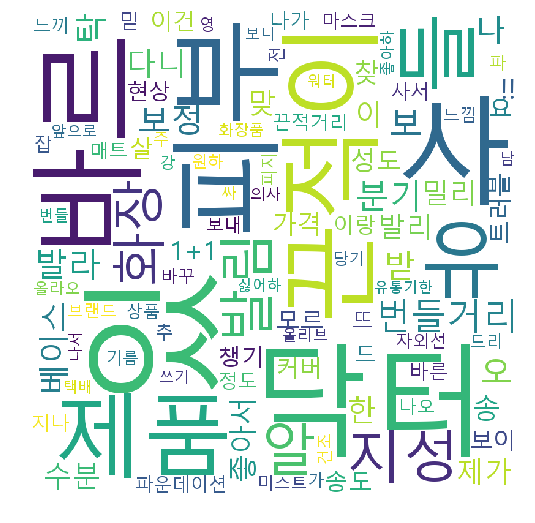

In [32]:
from konlpy.tag import Komoran
komoran = Komoran()

pos_list = []
for i in range(500) : # 갯수 늘려도 매우빠름
    morph = komoran.pos(data.iloc[i,0])
    pos_list.append(morph)
    
    my_pos_word_list = []
    for pos in pos_list:
        word_list = [word for word, pumsa in pos if pumsa in ['NNP','VV']]
        my_pos_word_list.extend(word_list)

### 빈도수 세기 
from collections import Counter
counts = Counter(my_pos_word_list)
counts_100 = counts.most_common(100)
print(counts_100)   # 몇개 제거해야겠군,,(정규)

remove_list = ["쓰","서","하","되","썬","크림"]
my_pos_count_list = []
for my_pos in my_pos_word_list:
    if my_pos not in remove_list:
        my_pos_count_list.append(my_pos)
#print(my_pos_count_list)

counts = Counter(my_pos_count_list)
counts_100 = counts.most_common(100)
print(counts_100)

### 워드클라우드 그리기 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud()
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
wordcloud = WordCloud(font_path = font_path, width = 800, height = 800, background_color = "white")
wordcloud = wordcloud.generate_from_frequencies(dict(counts_100)) # counts_100을 dictionary 형태로 만들어서 넣어줘야함(key,value)
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


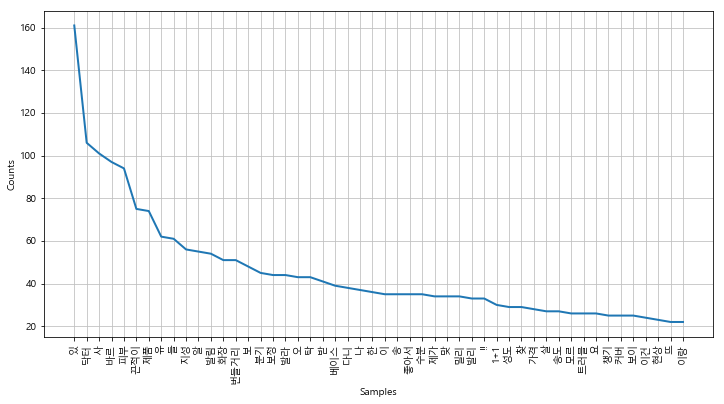

In [33]:
### Freq Dist 그리기 
import nltk
freq = nltk.Text(my_pos_count_list,name = "빈도그래프")
freq.vocab()
plt.figure(figsize = (12,6))
freq.plot(50)
plt.show()